# ObsID : 0945070133, SRCNUM : 10, Instru : Combined
**Simbad :** Star *2MASS J03332989-2714334* (https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%4013058032&Name=2MASS%20J03332989-2714334&submit=submit).

## ESASky
https://sky.esa.int/esasky/?target=53.37579166666667%20-27.242833333333333&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033329.9-271434
- IAU name : 4XMM J033329.9-271433
- RA : 03h 33m 29.959s
- DEC : -27° 14' 34.10"

``GAIA``
- Designation : Gaia DR3 5060545834987968640
- RA : 03h 33m 29.937s
- DEC : -27° 14' 33.44"
- Parallax : 1.9836 mas
- G : 17.5984
- G_BP - G_RP = 2.4856
- Effective temperature: T_eff = 3500 K

``2MASS``
- Name : 03332989-2714334
- RA : 03h 33m 29.898s
- DEC : -27° 14' 33.48"

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


The expected C-statistic value of a perfect fit is : **C-statistic ≈ 129 ± 16**. So between 113 and 145 approximately.

## Load files

In [3]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*spectrum_combined_grp_cstat.fits')[0])


1 spectrum  in use
 
Spectral Data File: ObsID0945070133_SRCNUM10_source_spectrum_combined_grp_cstat.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.162e-02 +/- 1.643e-03 (58.1 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-145
  Telescope: XMM Instrument: EPIC  Channel Type: PI
  Exposure Time: 8255 sec
 Using fit statistic: cstat
 Using Background File                ObsID0945070133_SRCNUM10_background_spectrum_combined.fits
  Background Exposure Time: 8256 sec
 Using Response (RMF) File            ObsID0945070133_SRCNUM10_response_combined.rmf for Source 1



In [4]:
print(f"Number of counts = {1.162e-02*8255} cts")

Number of counts = 95.9231 cts


The number of counts is lower than 100 cts, indicating that the C statistic should be a better choice than Chi-squared as a fit statistic.

## Plot spectrum

In [5]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.000001 0.05")
Plot("data")
spec.ignore("**-0.2 12.0-**")

     7 channels (1-7) ignored in spectrum #     1
     9 channels (137-145) ignored in spectrum #     1



(-0.5, 856.5, 656.5, -0.5)

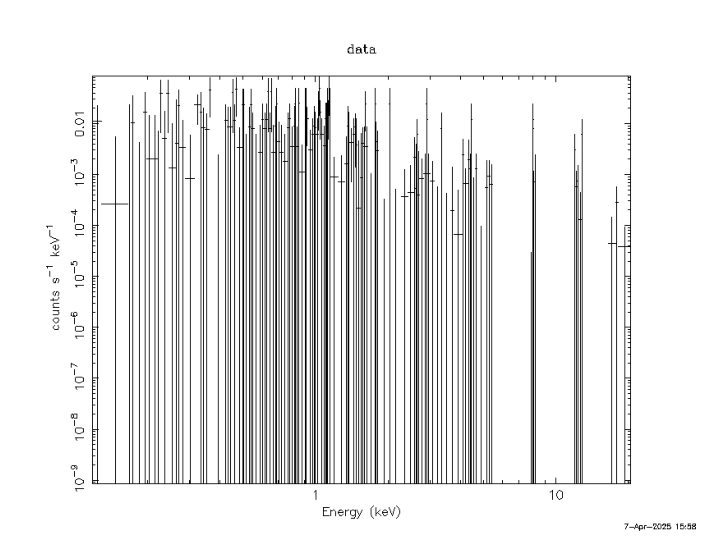

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*Spectrum2.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model
The C-statistic value of **139.2772** falls within the range [113–145], indicating a good fit.

In [7]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : C-Statistic              2.331991e+07     using 129 bins.

T

(-0.5, 855.5, 656.5, -0.5)

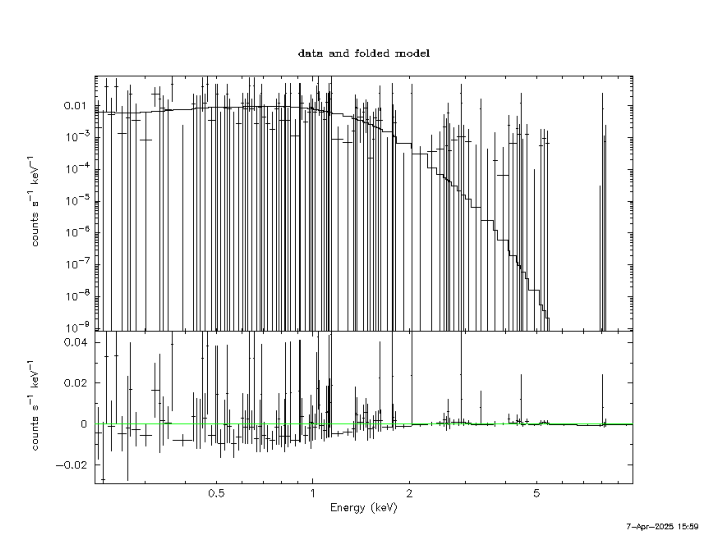

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*Spectrum_bbody2.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model
The C-statistic value of **135.7132** falls within the range [113–145], indicating a good fit.

Fourth lowest C-statistic value.

In [9]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              5.035462e+06     using 129 bins.

Test statistic : Chi-Squared              1.598409e+11     using 129 bins.
 Null hypothesis probability of 0.000000e+00 with 126 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
1.43348e+06  938396       -3      0.406146       199.249      0.322427
820426       764329       -4      0.139543       199.351      0.139229
534451       1.00654e+06  -5    0.00953899       199.361     0.06905

(-0.5, 854.5, 654.5, -0.5)

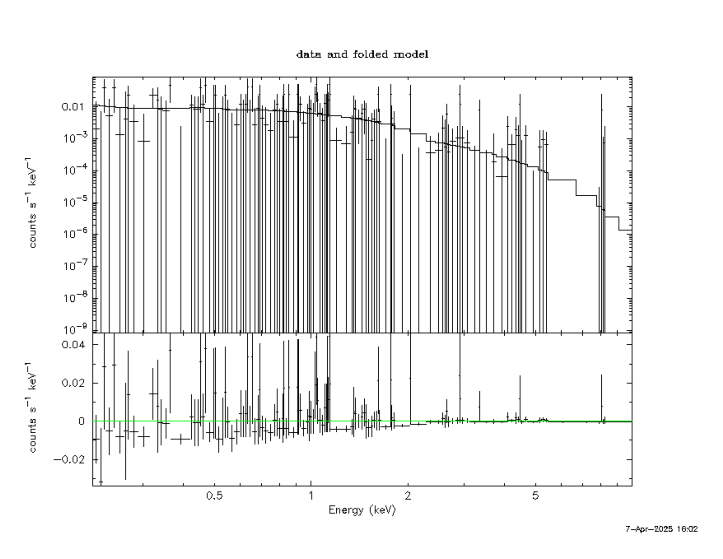

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_Spectrum_bremss2.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model
The C-statistic value of **132.8102** falls within the range [113–145], indicating a good fit.

Second lowest C-statistic value. 

In [11]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : C-Statistic              1.934057e+06     using 129 bins.

Test statistic : Chi-Squared              2.405295e+10     using 129 bins.
 Null hypothesis probability of 0.000000e+00 with 126 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        5:norm
1.19797e+06  576733       -3      0.337243       41.9335

(-0.5, 852.5, 655.5, -0.5)

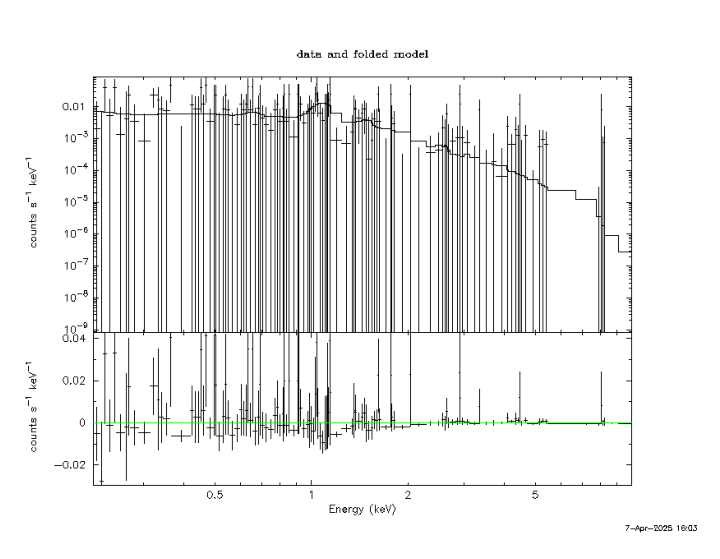

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*Spectrum_apec2.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model
The C-statistic value of **134.7690** falls within the range [113–145], indicating a good fit.

Third lowest C-statistic value.

In [13]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
mo.powerlaw.norm = 0.01
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.264898e+07     using 129 bins.

Test statistic : Chi-Squared              9.892473e+11     using 129 bins.
 Null hypothesis probability of 0.000000e+00 with 126 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                125126.7     using 129 bins.

Test statistic : Chi-Squared              9.892460e+07     using 129 bins.
 Null hypothesis probability of 0.000000e+00 with 126 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|

(-0.5, 847.5, 656.5, -0.5)

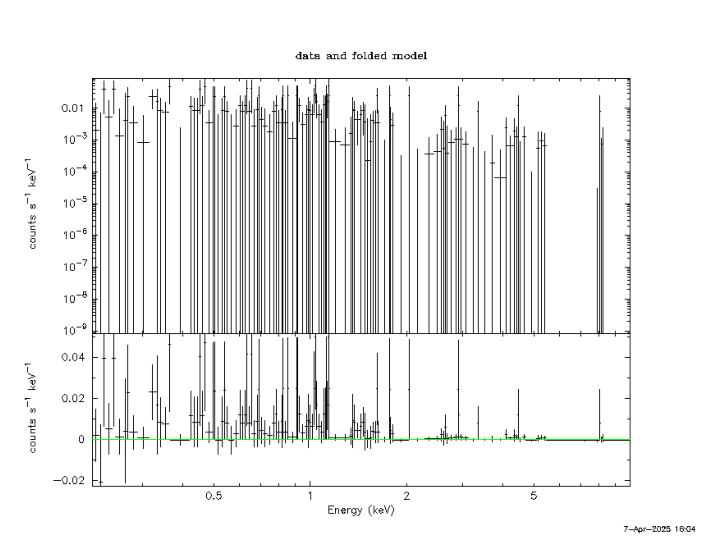

In [14]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*Spectrum_powerlaw2.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec + Apec model
The C-statistic value of **130.2412** falls within the range [113–145], indicating a good fit.

Lowest C-statistic value.

In [15]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apecapec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              3.870200e+06     using 129 bins.

Test statistic : Chi-Squared              9.621376e+10     using 129 bins.
 Null hypothesis probabili

(-0.5, 856.5, 659.5, -0.5)

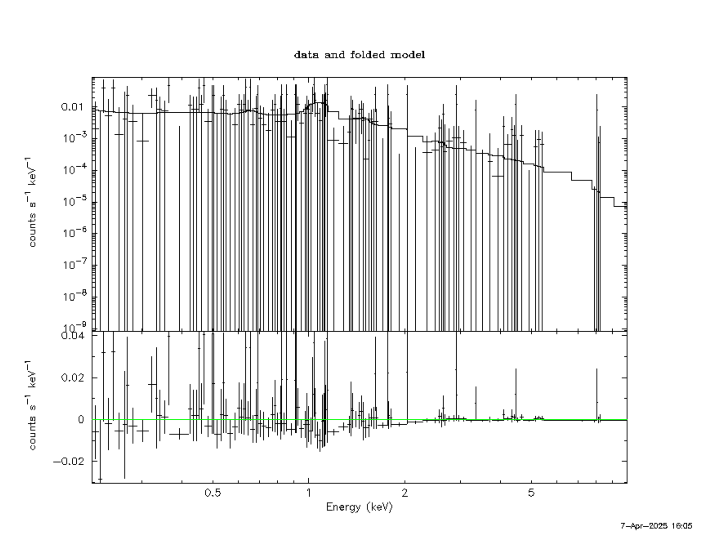

In [17]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*Spectrum_apecapec2.png')[0])
plt.imshow(img)
plt.axis('off')

The C-statistic values of all models fall within the expected range (113 to 145) to be considered a good fit.

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** (GAIA)

- RA = 53.3748310°
- Dec = -27.2428069°

53.37 -27.24

**Column density :** nH = 2e+20 cm^-2

In [18]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"nH = {nH_bbody*10**22} cm^-2")
print()
print(color.BOLD+"bremss (Fourth best fit)"+color.END)
print(f"nH = {nH_bremss*10**22} cm^-2")
print()
print(color.BOLD+"apec (Second best fit)"+color.END)
print(f"nH = {nH_apec*10**22} cm^-2")
print()
print(color.BOLD+"powerlaw (Third best fit)"+color.END)
print(f"nH = {nH_powerlaw*10**22} cm^-2")
print()
print(color.BOLD+"apec+apec (Best fit)"+color.END)
print(f"nH = {nH_apecapec*10**22} cm^-2")

The different models give a column density of :

bbody
nH = 56803775463.09281 cm^-2

bremss (Fourth best fit)
nH = 4.620850188657089e+18 cm^-2

apec (Second best fit)
nH = 19185134648379.51 cm^-2

powerlaw (Third best fit)
nH = 4.5032291399310325e+20 cm^-2

apec+apec (Best fit)
nH = 4105431.2964896355 cm^-2


## Flux
### X-ray flux
- X-ray flux of the best-fitting model ``Apec + Apec`` with C-statistic = 130.2412 using 129 bins: **5.4776e-14 ergs/cm^2/s**.
- X-ray flux of the second best-fitting model ``Apec`` with C-statistic = 132.8102 using 129 bins: **3.4072e-14 ergs/cm^2/s**.
- X-ray flux of the third best-fitting model ``Powerlaw`` with C-statistic = 134.7690 using 129 bins: **5.2308e-14 ergs/cm^2/s**.
- X-ray flux of the fourth best-fitting model ``Bremss`` with C-statistic = 135.7132 using 129 bins: **4.7272e-14 ergs/cm^2/s**.

In [19]:
Flux_apecapec = 4.5627e-14 # ergs/cm^2/s
Flux_apec = 3.4072e-14 # ergs/cm^2/s
Flux_pow = 5.2308e-14 # ergs/cm^2/s
Flux_bremss = 4.7272e-14 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Apec + Apec : F_x-ray = {Flux_apecapec} ergs/cm^2/s")
print(f"Apec : F_x-ray = {Flux_apec} ergs/cm^2/s")
print(f"Powerlaw : F_x-ray = {Flux_pow} ergs/cm^2/s")
print(f"Bremsstrahlung : F_x-ray = {Flux_bremss} ergs/cm^2/s")

X-ray flux : 
Apec + Apec : F_x-ray = 4.5627e-14 ergs/cm^2/s
Apec : F_x-ray = 3.4072e-14 ergs/cm^2/s
Powerlaw : F_x-ray = 5.2308e-14 ergs/cm^2/s
Bremsstrahlung : F_x-ray = 4.7272e-14 ergs/cm^2/s


### Optical flux

In [20]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 17.5984

F = F_optical(G)

print(color.BOLD+"Optical flux : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical flux : F_optical = 9.590236099191845e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [21]:
print(color.BOLD+"X-ray Flux / Optical Flux ratio : "+color.END)
print(f"Apec + Apec : F_x-ray/F_optical = {Flux_apecapec/F}")
print(f"Apec : F_x-ray/F_optical = {Flux_apec/F}")
print(f"Powerlaw : F_x-ray/F_optical = {Flux_pow/F} ergs/cm^2/s")
print(f"Bremsstrahlung : F_x-ray/F_optical = {Flux_bremss/F} ergs/cm^2/s")

X-ray Flux / Optical Flux ratio : 
Apec + Apec : F_x-ray/F_optical = 0.04757651378764796
Apec : F_x-ray/F_optical = 0.03552780103387777
Powerlaw : F_x-ray/F_optical = 0.054542974186431045 ergs/cm^2/s
Bremsstrahlung : F_x-ray/F_optical = 0.04929180002563602 ergs/cm^2/s


### Maccacaro et al. paper: log(fx/fv)
https://articles.adsabs.harvard.edu/pdf/1988ApJ...326..680M
- fx : X-ray flux in the 0.3-3.5 keV band in ergs/cm^2/s.
- mv : Visual magnitude.

In [22]:
def logfxfv(fx,mv):
    return np.log10(fx)+(mv/2.5)+5.37

fx_apecapec = 3.4435e-14 # ergs/cm^2/s
fx_apec = 2.8337e-14 # ergs/cm^2/s
fx_pow = 3.4539e-14 # ergs/cm^2/s
fx_bremss = 3.5319e-14 # ergs/cm^2/s

logfxfv_apecapec = logfxfv(fx_apecapec,G)
logfxfv_apec = logfxfv(fx_apec,G)
logfxfv_bremss = logfxfv(fx_bremss,G)
logfxfv_pow = logfxfv(fx_pow,G)

print(color.BOLD+"X-ray flux [0.3-3.5] keV : "+color.END)
print(f"Apec + Apec : fx = {fx_apecapec} ergs/cm^2/s")
print(f"Apec : fx = {fx_apec} ergs/cm^2/s")
print(f"Bremsstrahlung : fx = {fx_bremss} ergs/cm^2/s")
print(f"Powerlaw : fx = {fx_pow} ergs/cm^2/s")
print()
print(color.BOLD+"log(fx/fv) : "+color.END)
print(f"Apec + Apec : log(fx/fv) = {logfxfv_apecapec}")
print(f"Apec : log(fx/fv) = {logfxfv_apec}")
print(f"Bremsstrahlung : log(fx/fv) = {logfxfv_bremss}")
print(f"Powerlaw : log(fx/fv) = {logfxfv_pow}")

X-ray flux [0.3-3.5] keV : 
Apec + Apec : fx = 3.4435e-14 ergs/cm^2/s
Apec : fx = 2.8337e-14 ergs/cm^2/s
Bremsstrahlung : fx = 3.5319e-14 ergs/cm^2/s
Powerlaw : fx = 3.4539e-14 ergs/cm^2/s

log(fx/fv) : 
Apec + Apec : log(fx/fv) = -1.053639912678661
Apec : log(fx/fv) = -1.1382861298264038
Bremsstrahlung : log(fx/fv) = -1.0426316012617969
Powerlaw : log(fx/fv) = -1.0523302406182653


## Luminosity

In [ ]:
"""GAIA"""

P_mas = 1.9836 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity_apecapec = 4*np.pi*Flux_apecapec*(d_cm)**2 # erg/s
Luminosity_apec = 4*np.pi*Flux_apec*(d_cm)**2 # erg/s
Luminosity_pow = 4*np.pi*Flux_pow*(d_cm)**2 # erg/s
Luminosity_bremss = 4*np.pi*Flux_bremss*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : d = {d_cm} cm")
print(color.BOLD+"Luminosity :"+color.END)
print(f"Apec + Apec : L_x-ray = {Luminosity_apecapec} erg/s")
print(f"Apec : L_x-ray = {Luminosity_apec} erg/s")
print(f"Powerlaw : L_x-ray = {Luminosity_pow} erg/s")
print(f"Bremsstrahlung : L_x-ray = {Luminosity_bremss} erg/s")